# T2-1

Desenvolva um sistema que apresente um mapa com informações da sua escolha, respondendo ao itens 1 e 2.

In [ ]:
%%bash
#Instalação das bibliotecas
pip3 install geopandas
pip3 install geobr

In [ ]:
#Importação das bibliotecas
import geopandas as gpd
import geobr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Item 1

Desenvolva uma aplicação utilizando Python e Geopandas que apresente de forma gráfica um mapa, considerando informações de sua escolha. Analise, detalhe e explique as informações apresentadas. É requerido que **ao menos um mapa** seja obtido da fonte de dados **GeoBR**. Mapas já trabalhados podem ser utilizados, porém as informações analisadas devem ser diferentes dos exemplos e exercícios já utilizados nas aulas.

In [ ]:
coluna = 'schools'
federal = 'Federal'

gdf_estados = geobr.read_state()
gdf_estados['schools'] = 0

gdf_estados_escolas = geobr.read_schools()
gdf_estados_escolas = gdf_estados_escolas[gdf_estados_escolas['government_level'] == federal]

escolas_contados = gdf_estados_escolas['abbrev_state'].value_counts()
for i in escolas_contados.index:
  j = gdf_estados['abbrev_state'] == i
  gdf_estados.loc[j, 'schools'] = escolas_contados[i]


gdf_estados_escolas.plot(ax=mapa,legend=True, alpha=0.7,color= 'r')

print('O mapa abaixo é um mapa de calor(heatmap) sobre a quantidade de escolas federais pelo brasil, onde a cor dos estados reflete a quantidade de instalações presentes no mesmo.\nOs pontos vermelhos são as localizações exatas das instituições, podemos observar que a concentração de escolas em regiões litorâneas é maior.')

O mapa abaixo é um mapa de calor(heatmap) sobre a quantidade de escolas federais pelo brasil, onde a cor dos estados reflete a quantidade de instalações presentes no mesmo.
Os pontos vermelhos são as localizações exatas das instituições, podemos observar que a concentração de escolas em regiões litorâneas é maior.


<Figure size 432x288 with 0 Axes>

## Item 2

Desenvolva uma aplicação utilizando Python e Geopandas que apresente de forma gráfica um mapa, considerando informações de sua escolha. Analise, detalhe e explique as informações apresentadas. É requerido que **ao menos um mapa** seja obtido de fonte de dados **diferente** da GeoBR. Mapas já trabalhados podem ser utilizados, porém as informações analisadas devem ser diferentes dos exemplos e exercícios já utilizados nas aulas.

In [ ]:
from google.colab import drive
drive.mount('/drive') #monta a base no google drive

In [ ]:
DRIVE='/drive/Shareddrives/BasesPublicas/'

In [ ]:
cvel_bairros = gpd.read_file(DRIVE+'Mapas/Cascavel/vw_bairros.zip')
cvel_distritos = gpd.read_file(DRIVE+'Mapas/Cascavel/vw_distritos.zip')
cvel_terminais = gpd.read_file('Cettrans.zip')
cvel_brs = gpd.read_file('BRs.zip')

Vemos o mapa de Cascavel - PR com todos os distritos.
Em azul vemos as rodovias federais que passam por Cascavel.
Em amarelo vemos os bairros da cidade.
Os pontos vermelhos são terminais de ônibus.


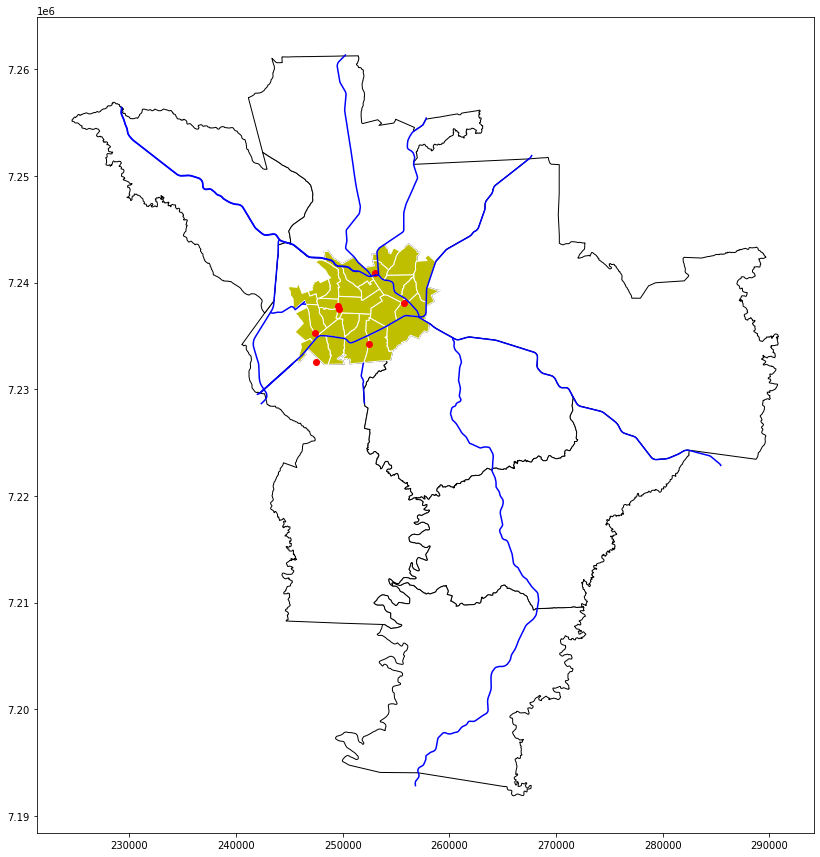

In [ ]:
a = cvel_distritos.plot(figsize = (15,15), color='w',edgecolor='k')
cvel_bairros.plot(ax = a, color = 'y', edgecolor='w')

cvel_brs.plot(ax = a, color='b')
cvel_terminais.plot(ax=a,color='r')

print('Vemos o mapa de Cascavel - PR com todos os distritos.\nEm azul vemos as rodovias federais que passam por Cascavel.\nEm amarelo vemos os bairros da cidade.\nOs pontos vermelhos são terminais de ônibus.')